In [4]:
%matplotlib inline
import numpy as np
#%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation, LinearTriInterpolator
from scipy.interpolate import splrep, splev, splprep, interp1d
from scipy.optimize import curve_fit
import matplotlib.font_manager as fm
import matplotlib.ticker as mtick
from matplotlib.ticker import ScalarFormatter
from decimal import Decimal
import scipy
from scipy import special
from scipy.integrate import trapz, simps
import I_n_P as P
import norm_module as M
from importlib import reload
plt.style.use('ggplot')
path = 'C:\\WINDOWS\\Fonts\\BOOKOS.TTF'
prop = fm.FontProperties(fname=path)
plt.rcParams['font.family'] = prop.get_name()
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'heavy'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['text.usetex']=True
plt.rcParams['text.latex.preamble']=[r'\usepackage{amsmath}',
          r'\usepackage{xfrac}']

In [5]:
reload(M)

<module 'norm_module' from 'C:\\Users\\giannis\\Desktop\\Python_scrpts\\norm_module.py'>

# Particle Flux (e)

In [6]:
'''Reading values for bottom and top cap'''
exb_bot, par_bot, R_bot, psi_bot = M.particle_read_bottom()
mag_bot, _, _ = M.magnetic_norm_read_bottom()
exb_top, par_top, R_top, psi_top = M.particle_read_top()
mag_top, _, _ = M.magnetic_norm_read_top()

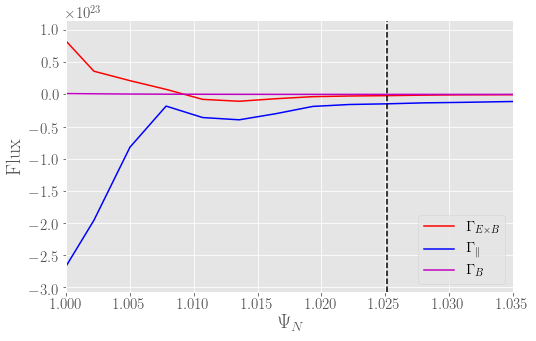

In [7]:
'''Bottom Fluxes'''
plt.rcParams['figure.figsize'] = 8, 5
plt.plot(psi_bot[14:34],exb_bot[14:34],'r',label=r'$\Gamma_{E\times B}$')
plt.plot(psi_bot[14:34],par_bot[14:34],'b',label=r'$\Gamma_\parallel$')
plt.plot(psi_bot[14:34],mag_bot[14:34],'m',label=r'$\Gamma_B$')
plt.axvline(x=1.00,color='k',linewidth = 2, linestyle='--')
plt.axvline(x=1.02512,color='k', linestyle='--')
#plt.text(1.02522,3.8e22,r'$96\,\%$',rotation=90,fontsize=18)
#plt.axvline(x=1.02805,color='k', linestyle='--')
#plt.text(1.02815,3.8e22,r'$77\,\%$',rotation=90,fontsize=18)
#plt.axvline(x=1.03097,color='k', linestyle='--')
#plt.text(1.031,3.8e22,r'$70\,\%$',rotation=90,fontsize=18)
#plt.axvline(x=1.03391,color='k', linestyle='--')
#plt.text(1.034,3.88e22,r'$65\,\%$',rotation=90,fontsize=18)
#plt.axvline(x=1.03689,color='k', linestyle='--')
#plt.text(1.037,3.8e22,r'$60\,\%$',rotation=90,fontsize=18)
#plt.axvline(x=1.03987,color='k', linestyle='--')
#plt.text(1.0405,3.8e22,r'$57\,\%$',rotation=90,fontsize=18)
plt.xlim(1.00,1.035)
plt.xlabel(r'$\Psi_N$')
plt.ylabel('Flux')
#plt.ylim(-7e23,5e23)
plt.legend(loc=4)
plt.show()

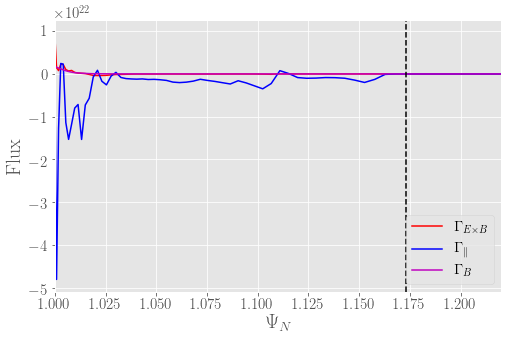

In [8]:
'''Top Fluxes'''
plt.rcParams['figure.figsize'] = 8, 5
plt.plot(psi_top,exb_top,'r',label=r'$\Gamma_{E\times B}$')
plt.plot(psi_top,par_top,'b',label=r'$\Gamma_\parallel$')
plt.plot(psi_top[:-1],mag_top,'m',label=r'$\Gamma_B$')
plt.axvline(x=1.00,color='k',linewidth = 2, linestyle='--')
plt.axvline(x=1.1731,color='k', linestyle='--')
#plt.text(1.1741,0.5e22,r'$70\,\%$',rotation=90,fontsize=18)
#plt.axvline(x=1.2354,color='k', linestyle='--')
#plt.text(1.24,0.5e22,r'$70\,\%$',rotation=90,fontsize=18)
#plt.axvline(x=1.1526,color='k', linestyle='--')
#plt.text(1.1536,0.5e22,r'$66\,\%$',rotation=90,fontsize=18)
#plt.axvline(x=1.1024,color='k', linestyle='--')
#plt.text(1.11,0.5e22,r'$56\,\%$',rotation=90,fontsize=18)
#plt.axvline(x=1.0489,color='k', linestyle='--')
#plt.text(1.06,0.5e22,r'$46\,\%$',rotation=90,fontsize=18)
plt.xlim(1.00,1.22)
plt.xlabel(r'$\Psi_N$')
plt.ylabel('Flux')
#plt.ylim(-7e23,5e23)
plt.legend(loc=4)
plt.show()

# Integrals

In [9]:
'''limits for bottom integrals'''
psi_bot[14], psi_bot[23]

(0.999356655947, 1.02512932967)

In [10]:
'''Bottom Integrals'''
bot1 = M.Bottom_Integral(R_bot[14:23],exb_bot[14:23])
bot2 = M.Bottom_Integral(R_bot[14:23],par_bot[14:23])
bot3 = M.Bottom_Integral(R_bot[14:23],mag_bot[14:23])
bot_tot = bot1+bot2+bot3
print('exb:', bot1)
print('par:', bot2)
print('mag:', bot3)
print('total_bot:', bot_tot)

exb: 2.580285370859418e+21
par: -1.4403890365751187e+22
mag: 7.800732607682326e+19
total_bot: -1.1745597668814947e+22


In [11]:
'''limits for top integrals'''
psi_top[0],psi_top[55]

(0.999912522423, 1.17314930816)

In [12]:
'''Top Integrals'''
top1 = M.Bottom_Integral(R_top[:55],exb_top[:55])
top2 = M.Bottom_Integral(R_top[:55],par_top[:55])
top3 = M.Bottom_Integral(R_top[:55],mag_top[:55])
top_tot = top1+top2+top3
print('exb:', top1)
print('par:', top2)
print('mag:', top3)
print('total_top', top_tot)

exb: 6.164689220388209e+20
par: -9.685112824445582e+21
mag: 4.5753383592665036e+20
total_top -8.611110066480111e+21


In [13]:
'''total'''
total = bot_tot-top_tot
print('total:', total)

total: -3.1344876023348357e+21


In [14]:
'''Comparisons'''
side = 3.02e21
percentage = -(side/total)*100
print('percentage:', percentage)

percentage: 96.34748587776977


# Electron Heat Flux

In [15]:
'''Reading values for bottom and top cap'''
exb_bot_h, par_bot_h, R_bot_h, psi_bot_h = M.e_heat_read_bottom()
mag_bot_h, _, _ = M.e_mag_heat_norm_read_bottom()
exb_top_h, par_top_h, R_top_h, psi_top_h = M.e_heat_read_top()
mag_top_h, _, _ = M.e_mag_heat_norm_read_top()

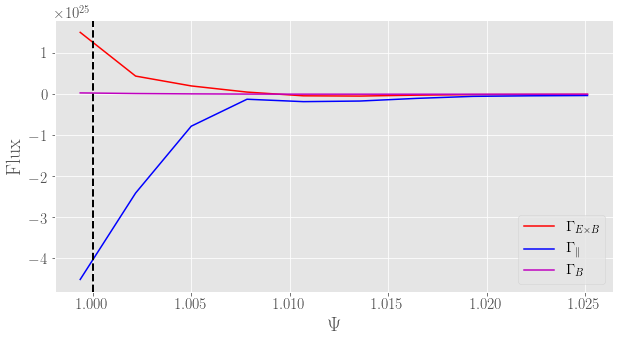

In [16]:
'''Bottom Fluxes'''
plt.rcParams['figure.figsize'] = 10, 5
plt.plot(psi_bot_h[:10],exb_bot_h[:10],'r',label=r'$\Gamma_{E\times B}$')
plt.plot(psi_bot_h[:10],par_bot_h[:10],'b',label=r'$\Gamma_\parallel$')
plt.plot(psi_bot_h[:10],mag_bot_h[:10],'m',label=r'$\Gamma_B$')
plt.axvline(x=1.00,color='k',linewidth = 2, linestyle='--')
plt.xlabel(r'$\Psi$')
plt.ylabel('Flux')
plt.legend(loc=4)
plt.show()

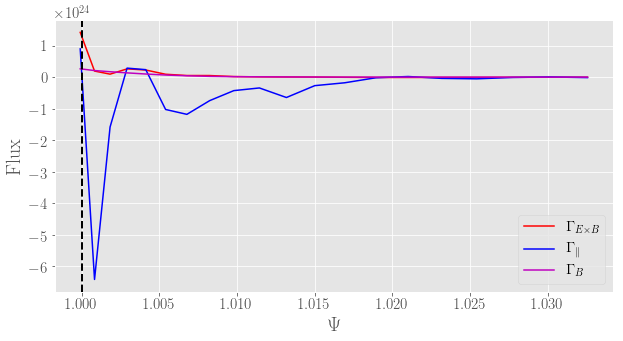

In [17]:
'''Top Fluxes'''
plt.rcParams['figure.figsize'] = 10, 5
plt.plot(psi_top_h[:20],exb_top_h[:20],'r',label=r'$\Gamma_{E\times B}$')
plt.plot(psi_top_h[:20],par_top_h[:20],'b',label=r'$\Gamma_\parallel$')
plt.plot(psi_top_h[:20],mag_top_h[:20],'m',label=r'$\Gamma_B$')
plt.axvline(x=1.00,color='k',linewidth = 2, linestyle='--')
plt.xlabel(r'$\Psi$')
plt.ylabel('Flux')
plt.legend(loc=4)
plt.show()

## Integrals

In [18]:
'''Bottom Integrals'''
bot1_h = M.Bottom_Integral(R_bot_h[:20],exb_bot_h[:20])
bot2_h = M.Bottom_Integral(R_bot_h[:20],par_bot_h[:20])
bot3_h = M.Bottom_Integral(R_bot_h[:20],mag_bot_h[:20])
bot_tot_h = bot1_h+bot2_h+bot3_h
print('exb:', bot1_h)
print('par:', bot2_h)
print('mag:', bot3_h)
print('total_bot:', bot_tot_h)

exb: 3.3543626066855596e+23
par: -1.5944238566025813e+24
mag: 1.2539844146273695e+22
total_bot: -1.2464477517877516e+24


In [19]:
'''Top Integrals'''
top1_h = M.Bottom_Integral(R_top_h[:35],exb_top_h[:35])
top2_h = M.Bottom_Integral(R_top_h[:35],par_top_h[:35])
top3_h = M.Bottom_Integral(R_top_h[:35],mag_top_h[:35])
top_tot_h = top1_h+top2_h+top3_h
print('exb:', top1_h)
print('par:', top2_h)
print('mag:', top3_h)
print('total_top:', top_tot_h)

exb: 8.524193567837471e+22
par: -6.218679005568803e+23
mag: 4.783865156862626e+22
total_top: -4.8878731330987934e+23


In [20]:
'''total'''
total_h = bot_tot_h-top_tot_h
print('total:', total_h)

total: -7.576604384778723e+23


In [21]:
'''Comparisons'''
side_h = 1.76e24
percentage_h = -(side_h/total_h)*100
print('percentage:', percentage_h)

percentage: 232.2940344537207
